In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.text as text
import numpy as np
import numpy.random as rnd
%matplotlib inline

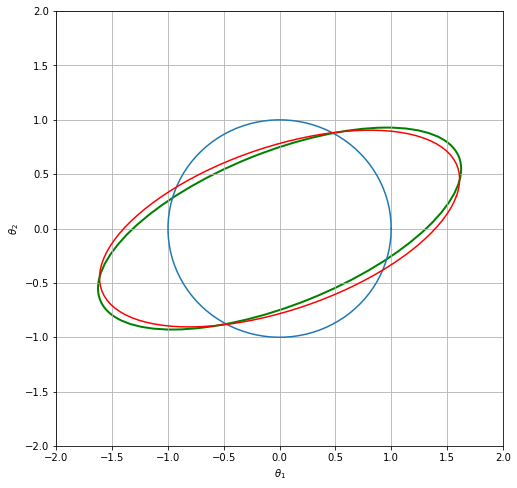

In [43]:
theta = np.linspace(0, 2*np.pi, 100)
r=1

gamma1 =  0.3
gamma2 =  0.3
kappa = 0

x = r * np.cos(theta)
y = r * np.sin(theta)

gamma = np.sqrt(gamma1**2 + gamma2**2)
mu = 1/((kappa-1)**2 - gamma**2)

u = x * mu * (1 - kappa + gamma1) + y * gamma2
v = y * mu * (1 - kappa - gamma1) + x * gamma2 

phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)

beta = phi/np.pi * 180

a = r / (1 - kappa + gamma)
b = r / (1 - kappa - gamma)
 
#print (a,b,gamma,phi/np.pi * 180,phi1/np.pi * 180, phi2/np.pi * 180)
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')

ax.plot(x,y)
ax.plot (u,v, color='r' )
ax.add_patch(patches.Ellipse(xy=(0,0), width=b*2, height=a*2, angle=beta, fill=False, color='g',lw=2))

ax.grid(True)

plt.show()

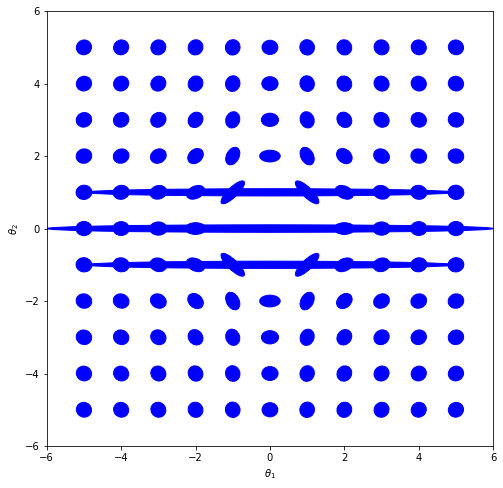

In [44]:
x = np.arange(-5,5.1, 1)
y = np.arange(-5, 5.1, 1)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-6 ,6)
ax.set_ylim(-6, 6)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')

def draw_ellipse(x,y,gamma1, gamma2, kappa):
    r=0.1  

    gamma = np.sqrt(gamma1**2+gamma2**2)
    if (gamma==0):
            print ( gamma1, gamma2)
    #mu = 1/((kappa-1)**2 - gamma**2)
    
    phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)  
   
    a = r/(1 - kappa + gamma)
    b = r/(1 - kappa - gamma)

    #print (a,b,phi)
    ax.add_patch(patches.Ellipse(xy=(x,y), width=b*2, height=a*2, angle=phi/np.pi*180,color='b',fill=True))   
        
for u in x:
    for v in y:     
        if (u!=0 or v!=0):
            k=0.51
            theta4 =  (u**2+v**2)**2
            g1 = k*(u**2-v**2)/theta4
            g2 = -2*k*u*v/theta4
            #print (g1,g2)
            #if (g1<=50 and g2<=50):
            draw_ellipse(u,v,g1,g2,k);
        #else:
            #print (u,v)
plt.show()

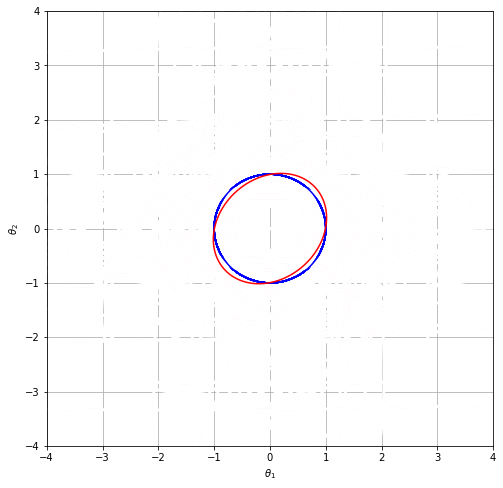

In [114]:
from ipywidgets import *
from IPython.display import display
import matplotlib.patches as patches

u = 0.0
v = 0.0
theta = np.linspace(0, 2*np.pi, 100)
r=1
x = r * np.cos(theta)
y = r * np.sin(theta)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.grid(True)
ax.plot(x,y)

phiText = FloatText(description=r'$\phi$')
display(phiText)
aText = FloatText(description='a')
display(aText)
bText = FloatText(description='b')
display(bText)

def plot_shear(gamma1, gamma2, kappa):
    global u # need to use global variables to track previous values
    global v
    ax.plot (u,v, color='w' ,lw=3) # use this to blit previous image
  
    gamma = np.sqrt(gamma1**2 + gamma2**2)
    
    if gamma==0: # we want to avoid a divide by zero error
            aText.value= 0
            bText.value= 0 
            phiText.value =  0
            return 
        
    mu = 1/((kappa-1)**2 - gamma**2)
        
    u = x * mu * (1 - kappa + gamma1) + y * gamma2
    v = y * mu * (1 - kappa - gamma1) + x * gamma2 

    phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)
    phiText.value=  '{:1.1f}'.format(phi/np.pi*180)
    
    a = r / (1 - kappa + gamma)
    b = r / (1 - kappa - gamma)
    aText.value='{:1.2f}'.format(a) 
    bText.value='{:1.2f}'.format(b) 
    
    ax.plot(x,y, color='b')
    ax.plot (u,v, color='r' )
    display(fig)
    
interact(plot_shear, gamma1=(-0.8,0.81,0.1),gamma2=(-0.8,0.81,0.1), kappa=(-0.8,0.81,0.1));
